In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [4]:
path1880 = r'C:\Users\Seba\PycharmProjects\pandas_python3\pydata-book-master\ch02\names\yob1880.txt'
names1880 = pd.read_csv(path1880, names=['name', 'sex', 'births'])

In [5]:
names1880.head()

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [7]:
# ocupar la sume de los nacimientos para encontrar la cantidad de hombres y mujeres
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [8]:
# concatenar todos los datos en uno solo
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']

In [9]:
for year in years:
    path = r'C:\Users\Seba\PycharmProjects\pandas_python3\pydata-book-master\ch02\names\yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [10]:
names = pd.concat(pieces, ignore_index=True)

In [11]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [14]:
# obtener el total de los nacimientos
total_births = names.pivot_table('births', index='year',
                                columns='sex', aggfunc=sum)

In [15]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


In [18]:
# insertar una columna prop que sera la fraccion de bebes relativo al total de nacimientos
# el valor prop indicara que 2 de cada 100 bebes tiene un nombre x 
# se ocupa un group por ano y sexo y luego se anade a cada grupo

def add_prop(group):
    births = group.births.astype(float)
    
    group['prop'] = births/births.sum()
    return group

In [19]:
names = names.groupby(['year', 'sex']).apply(add_prop)

In [20]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [22]:
# sanity check para ver si las proporciones suman uno
np.allclose(names.groupby(['year', 'sex']).prop.sum(),1)

True

In [23]:
# sacar el top 1000 de los nombres

def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]

In [24]:
grouped = names.groupby(['year', 'sex'])

In [25]:
top1000 = grouped.apply(get_top1000)

In [27]:
top1000.head()

name sex  births  year      prop
year sex                                         
1880 F   0       Mary   F    7065  1880  0.077643
         1       Anna   F    2604  1880  0.028618
         2       Emma   F    2003  1880  0.022013
         3  Elizabeth   F    1939  1880  0.021309
         4     Minnie   F    1746  1880  0.019188

In [28]:
# analizar tendencia de los nombres

boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [29]:
# obtener el numero de Johns y Marys por cada ano para plotearlo
total_births = top1000.pivot_table('births', index='year',
                                  columns='name', aggfunc=sum)

In [30]:
total_births.head()

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102,NaN,NaN,NaN,NaN,NaN,71,...,8,23,NaN,NaN,7,NaN,8,28,27,NaN
1881,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,NaN,81,...,NaN,22,NaN,NaN,10,NaN,9,21,27,NaN
1882,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,80,...,8,25,NaN,NaN,9,NaN,17,32,21,NaN
1883,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,79,...,NaN,23,NaN,NaN,10,NaN,11,35,25,NaN
1884,NaN,NaN,NaN,97,NaN,NaN,NaN,NaN,NaN,98,...,13,31,NaN,NaN,14,6,8,58,27,NaN


In [33]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011389048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000002DAF96A0>], dtype=object)

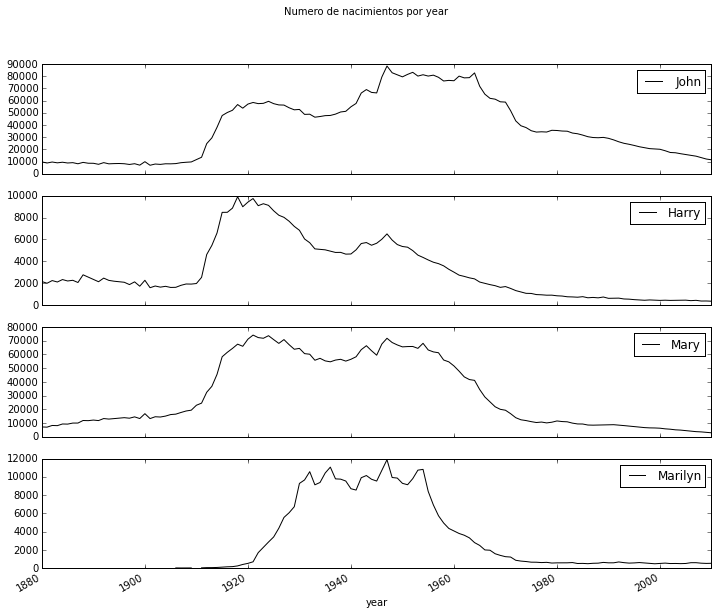

In [35]:
subset.plot(subplots=True, figsize=(12, 10), grid=False,
           title='Numero de nacimientos por year')

In [37]:
# determinar la diversidad de los nombres
table = top1000.pivot_table('prop', index='year',
                           columns='sex', aggfunc=sum)

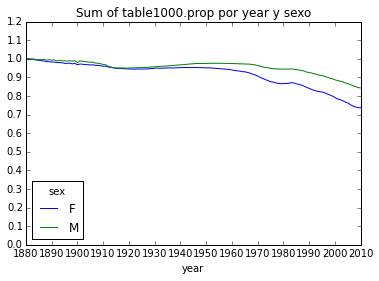

In [39]:
table.plot(title='Sum of table1000.prop por year y sexo', 
          yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [40]:
df = boys[boys.year == 2010]

In [41]:
df.head()

name sex  births  year      prop
year sex                                             
2010 M   1676644    Jacob   M   21875  2010  0.011523
         1676645    Ethan   M   17866  2010  0.009411
         1676646  Michael   M   17133  2010  0.009025
         1676647   Jayden   M   17030  2010  0.008971
         1676648  William   M   16870  2010  0.008887

In [44]:
# ordenar las proporciones en orden decendente, se quiere saber cuantos de los
# mas populares toman el 50%.
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()

In [45]:
prop_cumsum[:10]

year  sex         
2010  M    1676644    0.011523
           1676645    0.020934
           1676646    0.029959
           1676647    0.038930
           1676648    0.047817
           1676649    0.056579
           1676650    0.065155
           1676651    0.073414
           1676652    0.081528
           1676653    0.089621
Name: prop, dtype: float64

In [46]:
prop_cumsum.searchsorted(0.5)

array([116], dtype=int64)

In [47]:
prop_cumsum[prop_cumsum == 0.5]

Series([], Name: prop, dtype: float64)

In [52]:
df = boys[boys.year==1900]

In [53]:
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()

In [55]:
in1900.searchsorted(0.5) + 1

array([25], dtype=int64)

In [61]:
# aplicar la misma operacion a todos los gruppos
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q)[0] + 1

In [62]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)

In [63]:
diversity = diversity.unstack('sex')

In [64]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


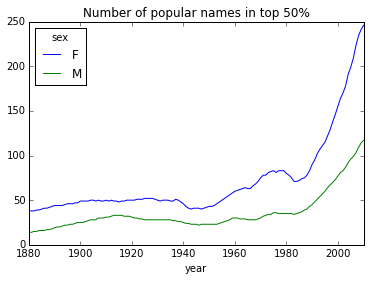

In [65]:
diversity.plot(title="Number of popular names in top 50%")

In [66]:
# the last letter revolution
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

In [67]:
table = names.pivot_table('births', index=last_letters,
                         columns=['sex', 'year'], aggfunc=sum)

In [68]:
table.head()

sex              F                                                          \
year          1880   1881   1882   1883   1884   1885   1886   1887   1888   
last_letter                                                                  
a            31446  31581  36536  38330  43680  45408  49100  48942  59442   
b              NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
c              NaN    NaN      5      5    NaN    NaN    NaN    NaN    NaN   
d              609    607    734    810    916    862   1007   1027   1298   
e            33378  34080  40399  41914  48089  49616  53884  54353  66750   

sex                  ...         M                                          \
year          1889   ...      2001    2002    2003    2004    2005    2006   
last_letter          ...                                                     
a            58631   ...     39124   38815   37825   38650   36838   36156   
b              NaN   ...     50950   49284   48065   45914   43144   42600   
c              NaN   ...     27113   27238   27697   26778   26078   26635   
d             1374   ...     60838   55829   53391   51754   50670   51410   
e            66663   ...    145395  144651  144769  142098  141123  142999   

sex                                          
year           2007    2008    2009    2010  
last_letter                                  
a             34654   32901   31430   28438  
b             42123   39945   38862   38859  
c             26864   25318   24048   23125  
d             50595   47910   46172   44398  
e            143698  140966  135496  129012  

[5 rows x 262 columns]

In [69]:
subtable = table.reindex(columns=[1990, 1960, 2010], level='year')

In [70]:
subtable.head()

sex               F                       M                
year           1990    1960    2010    1990    1960    2010
last_letter                                                
a            718704  691247  670605   52158    5204   28438
b               155     694     450   27942    3912   38859
c               369      49     946   28951   15476   23125
d              2539    3729    2607  101968  262112   44398
e            338553  435013  313833  146489  178823  129012

In [71]:
subtable.sum()

sex  year
F    1990    1897256
     1960    2022062
     2010    1759010
M    1990    2052070
     1960    2132588
     2010    1898382
dtype: float64

In [72]:
letter_prop = subtable / subtable.sum().astype(float)

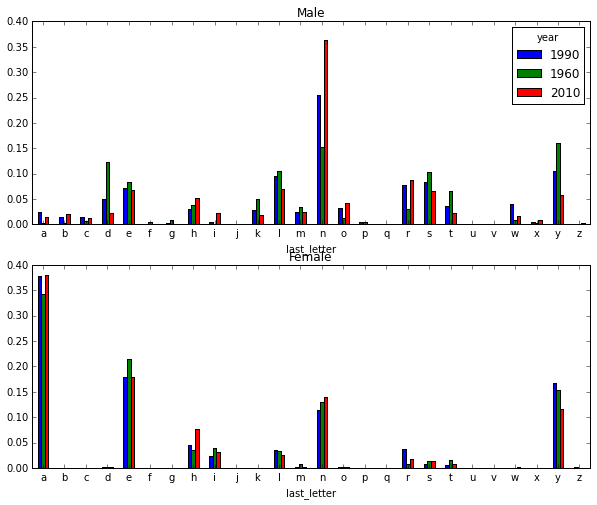

In [75]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
legend=False)

In [76]:
letter_prop = table / table.sum().astype(float)

In [77]:
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T

In [78]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


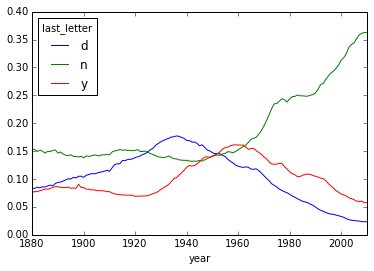

In [79]:
dny_ts.plot()

In [80]:
# encontrar nombres de que se convierte en nombres de mujer y viceversa
all_names = top1000.name.unique()

In [81]:
# buscar los nombres que se transforman de Lesley a leslie etc
# para saber si cambian de sexo
mask = np.array(['lesl' in x.lower() for x in all_names])

In [82]:
lesley_like = all_names[mask]

In [83]:
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [84]:
# filtrar los nombres del top 1000, sumar nacimientos agrupados por nombre
# para ver las frecuencias relativas
filtered = top1000[top1000.name.isin(lesley_like)]

In [85]:
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [86]:
table = filtered.pivot_table('births', index='year',
                            columns='sex', aggfunc=sum)

In [87]:
table.head()

sex,F,M
year,,
1880,8,79
1881,11,92
1882,9,128
1883,7,125
1884,15,125


In [88]:
# normalizar la tabla para que sume 1
table = table.div(table.sum(1), axis=0)

In [89]:
table.tail()

sex,F,M
year,,
2006,1,NaN
2007,1,NaN
2008,1,NaN
2009,1,NaN
2010,1,NaN


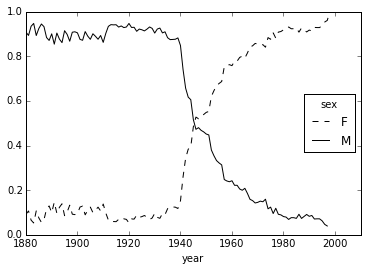

In [90]:
table.plot(style={'M': 'k-', 'F': 'k--'})